## *USING MACHINE LEARNING PREDICTON MODEL TO PREDICT HEART FAILURE*

**IMPORTING REQUIRED LIBRARIES.**

In [3]:
#import dependancies
#numpy to make numpy arrays,pandas to create data frame(more structured way)
#train test split to split data into train and test data
#accuracy score to evaluate our model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import csv
import xgboost  as xgb
from xgboost import XGBClassifier

# DATA COLLECTION; UPLOADING DATASET

In [10]:
#loading csv data to a Pandas Dataframe,ie structured tables

#my_data = files.upload()
my_data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


# **DATA CLEANING AND PREPROCESSING; Exploratory Data Analysis**

In [11]:
#print first and last 5  rows of the dataset
my_data= pd.read_csv( 'heart_failure_clinical_records_dataset.csv')
my_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
#number of rows and columns in the data set
my_data.shape

(299, 13)

In [13]:
my_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [14]:
#check for null values
my_data.isna().any()


age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [15]:
#statistical measures about the data
my_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
#getting some info about the dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


let....
0----Heart failure
1-----Healthy heart


# Correlation of the available data

Lets look at how the features are distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6648548cd0>,
      dtype=object)

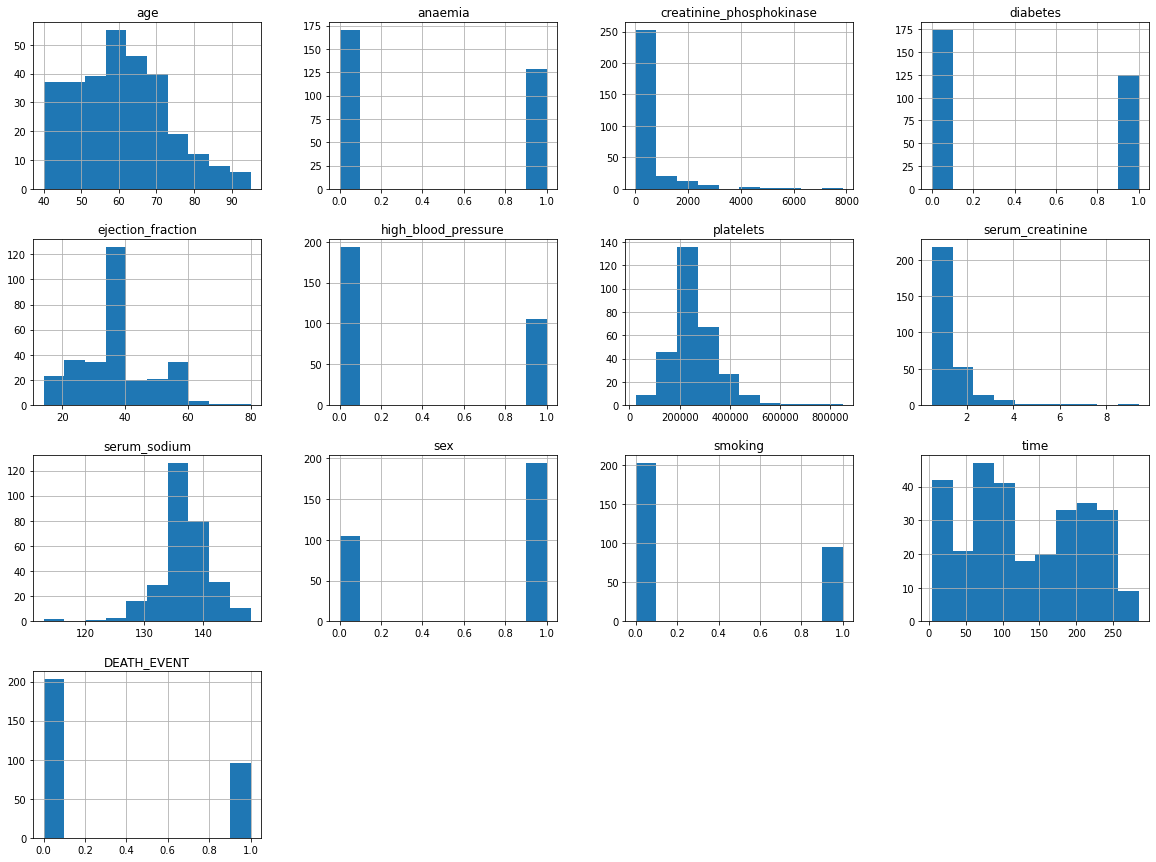

In [18]:
my_data.hist(figsize=(20,15))

<function matplotlib.pyplot.show>

<Figure size 720x720 with 0 Axes>

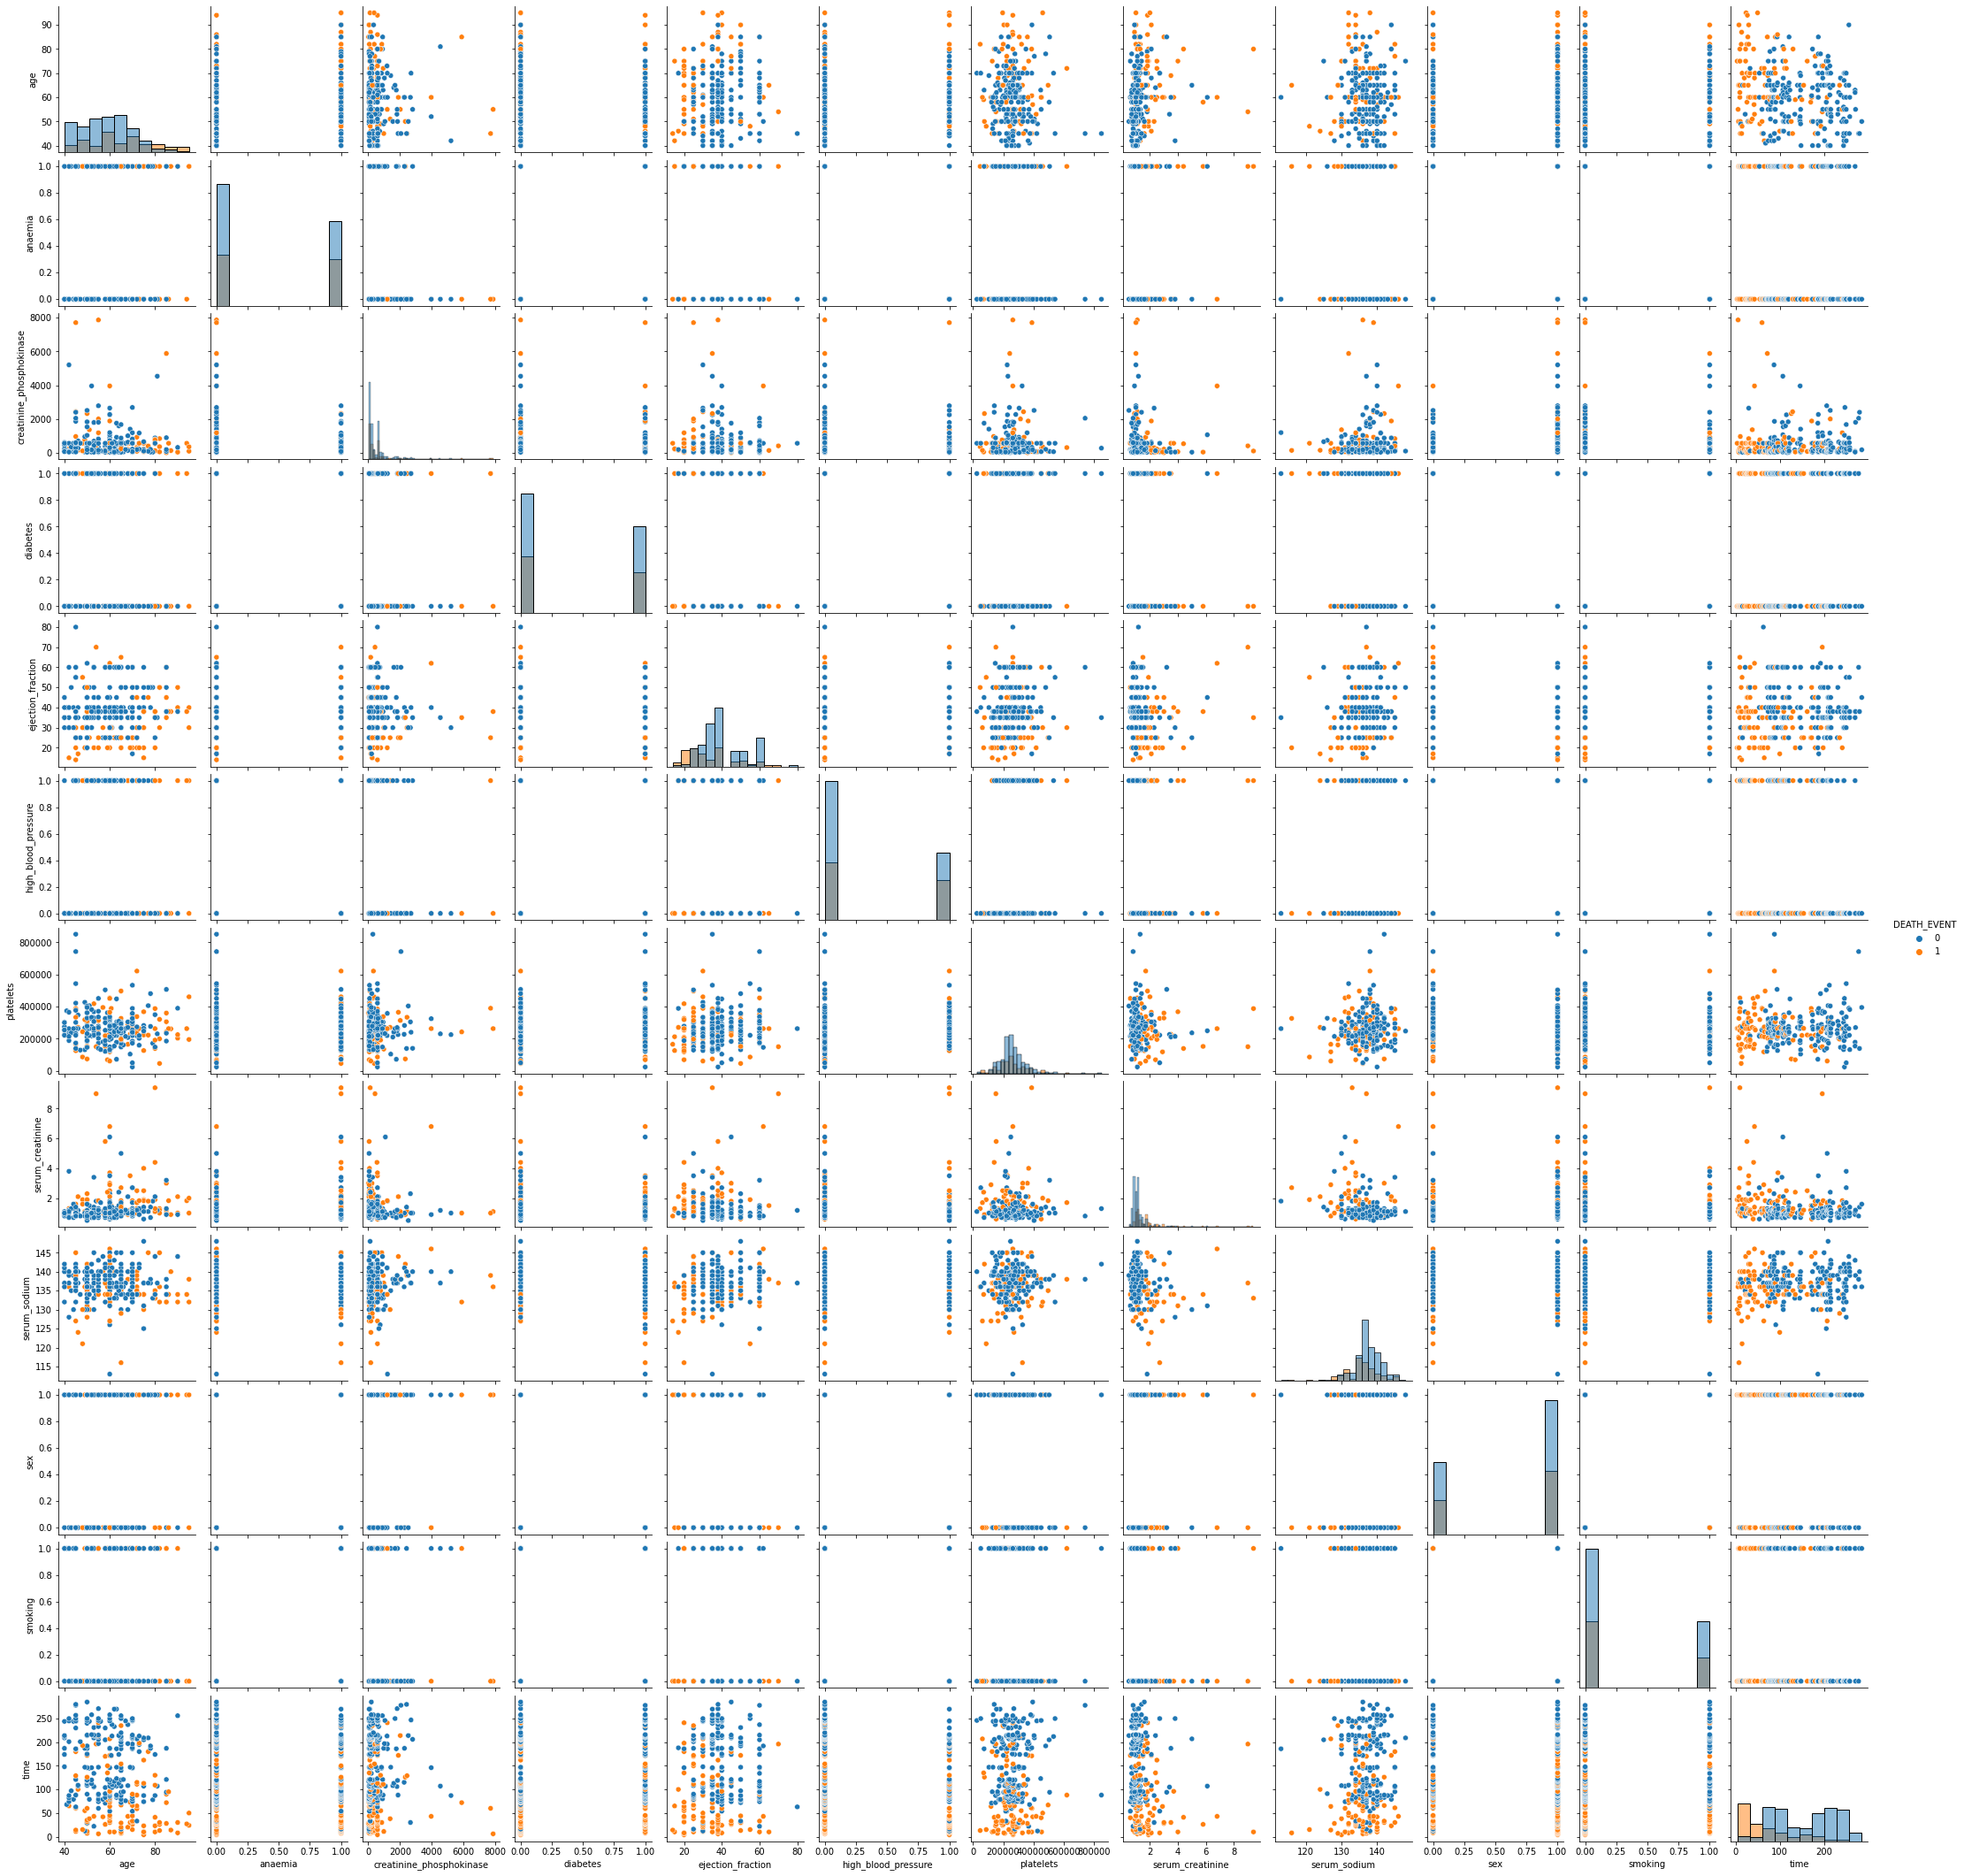

In [19]:
#visualize relationship of each feature 
plt.figure(figsize=(10,10))
sns.pairplot(data=my_data, hue = "DEATH_EVENT", diag_kind= "hist")
plt.show

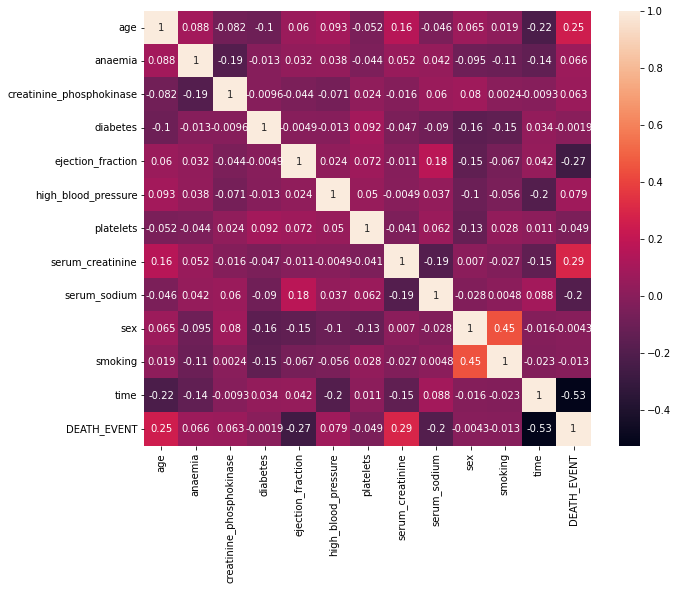

In [20]:
plt.figure(1 , figsize = (10 ,8 ))
cor = sns.heatmap( my_data.corr(), annot = True)

In [21]:
#chosing the target variable
#checking distribution of target variable
my_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [22]:
#dropping the target variable
X=my_data.drop(columns = 'DEATH_EVENT',axis=1)
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

Create the feature set by dropping the target column and replacing the categorial data with dummies

In [23]:
#let Y represent the target variable
Y = my_data['DEATH_EVENT']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


# **DATA SPLITTING**

In [24]:
#splitting data into Training data & Test data
#parameters,how much data you want as test data;0.2==20%, stratify to distribute data,random_state to split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


### **LOGISTIC REGRESSION**

In [25]:
#model training
#Logistic Regression
#training the logisticRegressionmodel with Training data
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

accuracy on testing data

In [26]:
#accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.8


**RESAMPLE DATASET TO AVOID BIASNESS**

In [27]:
from sklearn.utils import resample
data = my_data.copy()
class_size = int(len(data[data['DEATH_EVENT']==1])/2)

In [28]:
class_1 = data[data['DEATH_EVENT']==0]
class_2 = data[data['DEATH_EVENT']==1]

In [29]:
class_1_down = resample(class_1, replace=True,n_samples= class_size)
class_2_up = resample(class_2, replace=True,n_samples= class_size)

In [30]:
resample_data = pd.concat([class_1_down,class_2_up])

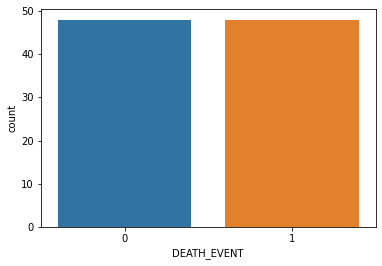

In [31]:
sns.countplot(x=resample_data['DEATH_EVENT'],data=data)
plt.show()

In [32]:
resample_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
177,49.0,1,69,0,50,0,132000.0,1.00,140,0,0,147,0
122,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95,0
210,70.0,0,212,1,17,1,389000.0,1.00,136,1,1,188,0
201,45.0,0,308,1,60,1,377000.0,1.00,136,1,0,186,0
133,63.0,0,193,0,60,1,295000.0,1.30,145,1,1,107,0


In [33]:
new_x=resample_data.drop(['DEATH_EVENT'],axis=1)
new_y=resample_data['DEATH_EVENT']

In [34]:
resample_data.shape

(96, 13)

Accuracy Score after resampling

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=2)
new_model = LogisticRegression()
new_model.fit(X_train,Y_train)

prediction = model.predict(X_test)
data_accuracy = accuracy_score(prediction, Y_test)
print('Accuracy on Test data : ', data_accuracy)


Accuracy on Test data :  0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **XGBOOST Model.**

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_score= disp_cm(Y_test, y_pred)
print(classification_report(Y_test,y_pred))


In [37]:
clf= xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05,use_label_encoder=False )

In [38]:
X_train, X_test, y_train, Y_test = train_test_split(X,Y)

In [45]:
clf.fit(X_train, y_train) #, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False))


XGBClassifier(learning_rate=0.05, n_estimators=1000, use_label_encoder=False)

In [48]:
clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.05, n_estimators=1000, use_label_encoder=False)

Most important features according to this model

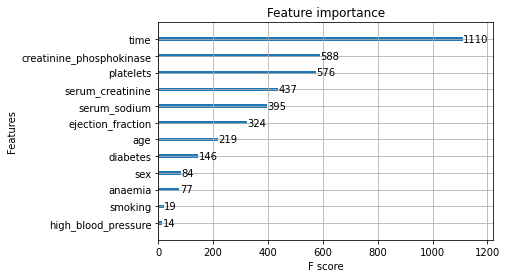

In [49]:
xgb.plot_importance(clf._Booster)

In [50]:
clf.score(X_test,Y_test)

0.8933333333333333

In [51]:
#building a predictive system
input_data = (90,1,47,0,40,1,204000,2.1,132,1,1,8)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,  -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
if prediction[0]== 0:
    print('Heart Failure')
else:
    print('Healthy Heart')

Healthy Heart
